In [13]:
import ee
import geemap
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import geeft
from geersd import Sentinel2


In [15]:
ee.Initialize()

In [16]:
aoi = ee.FeatureCollection('users/ryangilberthamilton/ParksColab/PNP/pnp_aoi').geometry().bounds()

In [17]:
doy = lambda x: x.set({'doy': ee.Image(x).date().getRelative('day', 'year').add(1).int()})

In [18]:
s2_sr = (
    Sentinel2
    .surface_reflectance()
    .filterBounds(aoi)
    .filterDate("2018", '2023')
    .filterCloud(5)
    .map(doy)
    .map(lambda x: x.set('year', x.date().format('YYYY')))
)

In [19]:
# convert ic to fc
def _image2Features(element: ee.Image) -> ee.Feature:
    x = ee.Image(element)
    return ee.Feature(x.geometry(), x.toDictionary(x.propertyNames()))

element_list = s2_sr.toList(s2_sr.size())
elem2feat = element_list.map(_image2Features)
fc = ee.FeatureCollection(elem2feat)


In [20]:
fc

In [21]:
gdf = gpd.GeoDataFrame.from_features(fc.getInfo()['features'])

In [22]:
gdf = gdf[['year', 'doy']].astype(int)


In [23]:

def date_time_scatter_plot(df: gpd.GeoDataFrame | pd.DataFrame):
    # Create a scatter plot
    fig, ax = plt.subplots()
    # Create a scatter plot on the axes

    ax.scatter(df["doy"], df["year"], alpha=0.5)

    # Set the limits for the x-axis and y-axis
    ax.set_xlim([1, 366])  # Julian dates range from 1 to 366
    ax.set_ylim(
        [df["year"].min() - 1, df["year"].max() + 1]
    )  # Years range from min to max year in the data

    # Set major tick marks every 50 on the x-axis and every 1 on the y-axis
    ax.set_xticks(range(0, 366, 50))
    ax.set_yticks(range(df["year"].min() - 1, df["year"].max() + 1, 1))

    ax.set_xlabel("Julian Day")
    ax.set_ylabel("Year")
    ax.set_title("Occurrence of Julian Days by Year")

    ax.grid(True)
    return fig





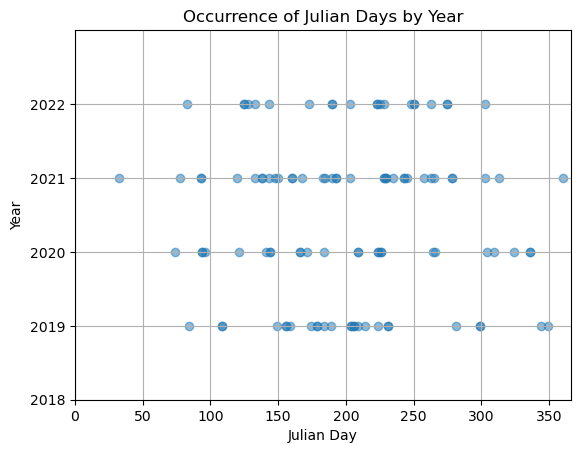

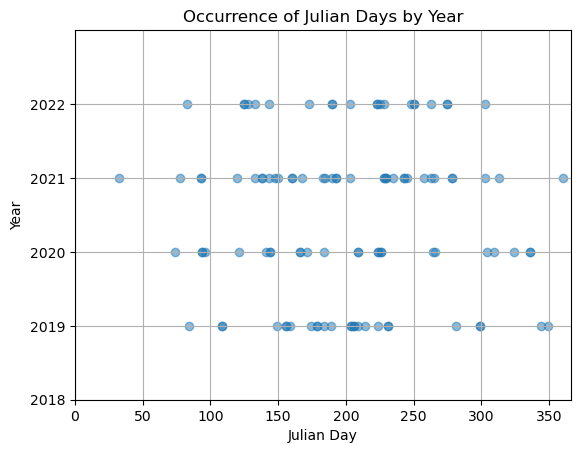

In [24]:
date_time_scatter_plot(gdf)